In [1]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn import datasets
from sklearn.metrics import accuracy_score, precision_recall_curve
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### Importing Data

In [2]:
df = pd.read_csv("C:\\Users\\suhas\\Documents\\College Projects\\Leaf-Classification-Medicinal\\features.csv")

In [3]:
del df['Unnamed: 0']
df

,common name,red_mean,red_var,blue_mean,blue_var,green_mean,green_var,area,perimeter,length,width,aspect ratio,form factor,rectangularity,perimeter ratio of length and width,contrast,correlation,entropy,inverse difference moments
0,anhui barberry,234.469870,53.357817,230.050427,64.794238,242.292892,33.301246,247343.5,2581.716941,315.243317,1118.116455,0.281941,0.466330,1.425058,1.801165,10.269227,0.997198,1.913799,0.897709
1,anhui barberry,239.078922,54.041678,237.209074,59.977314,244.533445,35.623070,150157.5,2290.212327,1046.269165,215.477997,4.855573,0.359754,1.501410,1.815112,5.256504,0.998636,1.334322,0.934745
2,anhui barberry,218.290143,69.075408,214.253183,76.172502,221.822949,63.520733,416083.0,3027.253080,1318.957520,438.283661,3.009370,0.570548,1.389332,1.722731,5.071890,0.999424,3.169692,0.838952
3,anhui barberry,217.351257,67.043355,212.549161,74.406684,223.302094,57.402874,447874.0,3194.875445,483.000000,1385.000000,0.348736,0.551389,1.493623,1.710319,4.559479,0.999406,4.024736,0.798812
4,anhui barberry,218.144054,74.602190,211.533462,87.120435,232.043578,46.657105,370707.0,2981.713976,1299.985229,417.071838,3.116934,0.523973,1.462576,1.736526,5.480717,0.999228,2.863736,0.849442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,yew plum pie,238.325835,55.421092,237.629440,57.630225,242.593002,41.559948,155142.5,3169.435093,1484.483887,140.012650,10.602498,0.194078,1.339714,1.951026,9.850791,0.997820,1.460218,0.930480
1903,yew plum pie,235.086392,56.583562,231.701753,65.931880,244.655587,30.072435,208088.0,3749.515389,1751.625732,155.323853,11.277249,0.185997,1.307472,1.966237,10.065573,0.997148,1.880481,0.906011
1904,yew plum pie,241.434539,47.188354,238.358278,57.717060,248.133264,24.358347,141974.5,3270.038124,1522.433594,139.203156,10.936775,0.166846,1.492716,1.967962,6.593897,0.997296,1.357995,0.935190
1905,yew plum pie,243.947001,43.065221,242.001275,50.432570,249.138740,23.235827,114726.5,2826.322395,1344.616089,121.611855,11.056620,0.180480,1.425314,1.927615,5.928888,0.997143,1.145098,0.946968


### Pre-processing

In [4]:
le = LabelEncoder()

In [5]:
col = []

for c in df.columns:
    col.append(c)
    
y = df[col[0]]
X = df[col[1:]]

In [6]:
scaler = StandardScaler()

In [7]:
df

,common name,red_mean,red_var,blue_mean,blue_var,green_mean,green_var,area,perimeter,length,width,aspect ratio,form factor,rectangularity,perimeter ratio of length and width,contrast,correlation,entropy,inverse difference moments
0,anhui barberry,234.469870,53.357817,230.050427,64.794238,242.292892,33.301246,247343.5,2581.716941,315.243317,1118.116455,0.281941,0.466330,1.425058,1.801165,10.269227,0.997198,1.913799,0.897709
1,anhui barberry,239.078922,54.041678,237.209074,59.977314,244.533445,35.623070,150157.5,2290.212327,1046.269165,215.477997,4.855573,0.359754,1.501410,1.815112,5.256504,0.998636,1.334322,0.934745
2,anhui barberry,218.290143,69.075408,214.253183,76.172502,221.822949,63.520733,416083.0,3027.253080,1318.957520,438.283661,3.009370,0.570548,1.389332,1.722731,5.071890,0.999424,3.169692,0.838952
3,anhui barberry,217.351257,67.043355,212.549161,74.406684,223.302094,57.402874,447874.0,3194.875445,483.000000,1385.000000,0.348736,0.551389,1.493623,1.710319,4.559479,0.999406,4.024736,0.798812
4,anhui barberry,218.144054,74.602190,211.533462,87.120435,232.043578,46.657105,370707.0,2981.713976,1299.985229,417.071838,3.116934,0.523973,1.462576,1.736526,5.480717,0.999228,2.863736,0.849442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,yew plum pie,238.325835,55.421092,237.629440,57.630225,242.593002,41.559948,155142.5,3169.435093,1484.483887,140.012650,10.602498,0.194078,1.339714,1.951026,9.850791,0.997820,1.460218,0.930480
1903,yew plum pie,235.086392,56.583562,231.701753,65.931880,244.655587,30.072435,208088.0,3749.515389,1751.625732,155.323853,11.277249,0.185997,1.307472,1.966237,10.065573,0.997148,1.880481,0.906011
1904,yew plum pie,241.434539,47.188354,238.358278,57.717060,248.133264,24.358347,141974.5,3270.038124,1522.433594,139.203156,10.936775,0.166846,1.492716,1.967962,6.593897,0.997296,1.357995,0.935190
1905,yew plum pie,243.947001,43.065221,242.001275,50.432570,249.138740,23.235827,114726.5,2826.322395,1344.616089,121.611855,11.056620,0.180480,1.425314,1.927615,5.928888,0.997143,1.145098,0.946968


In [8]:
le.fit(y)
species = le.classes_

In [9]:
df['common name'] = le.transform(y)
df

,common name,red_mean,red_var,blue_mean,blue_var,green_mean,green_var,area,perimeter,length,width,aspect ratio,form factor,rectangularity,perimeter ratio of length and width,contrast,correlation,entropy,inverse difference moments
0,0,234.469870,53.357817,230.050427,64.794238,242.292892,33.301246,247343.5,2581.716941,315.243317,1118.116455,0.281941,0.466330,1.425058,1.801165,10.269227,0.997198,1.913799,0.897709
1,0,239.078922,54.041678,237.209074,59.977314,244.533445,35.623070,150157.5,2290.212327,1046.269165,215.477997,4.855573,0.359754,1.501410,1.815112,5.256504,0.998636,1.334322,0.934745
2,0,218.290143,69.075408,214.253183,76.172502,221.822949,63.520733,416083.0,3027.253080,1318.957520,438.283661,3.009370,0.570548,1.389332,1.722731,5.071890,0.999424,3.169692,0.838952
3,0,217.351257,67.043355,212.549161,74.406684,223.302094,57.402874,447874.0,3194.875445,483.000000,1385.000000,0.348736,0.551389,1.493623,1.710319,4.559479,0.999406,4.024736,0.798812
4,0,218.144054,74.602190,211.533462,87.120435,232.043578,46.657105,370707.0,2981.713976,1299.985229,417.071838,3.116934,0.523973,1.462576,1.736526,5.480717,0.999228,2.863736,0.849442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,31,238.325835,55.421092,237.629440,57.630225,242.593002,41.559948,155142.5,3169.435093,1484.483887,140.012650,10.602498,0.194078,1.339714,1.951026,9.850791,0.997820,1.460218,0.930480
1903,31,235.086392,56.583562,231.701753,65.931880,244.655587,30.072435,208088.0,3749.515389,1751.625732,155.323853,11.277249,0.185997,1.307472,1.966237,10.065573,0.997148,1.880481,0.906011
1904,31,241.434539,47.188354,238.358278,57.717060,248.133264,24.358347,141974.5,3270.038124,1522.433594,139.203156,10.936775,0.166846,1.492716,1.967962,6.593897,0.997296,1.357995,0.935190
1905,31,243.947001,43.065221,242.001275,50.432570,249.138740,23.235827,114726.5,2826.322395,1344.616089,121.611855,11.056620,0.180480,1.425314,1.927615,5.928888,0.997143,1.145098,0.946968


In [10]:
df
a = set()
for i in range(len(df)):
    a.add(df.iloc[i]['common name'])
    
len(a)

32

### Splitting into Train and Test

In [11]:
col = []

for c in df.columns:
    col.append(c)

y_fin = df[col[0]]
X_fin= df[col[1:]]
X_train, X_test, y_train, y_test = train_test_split(X_fin, y_fin, stratify=y_fin, random_state = 1)

In [12]:
X_train

,red_mean,red_var,blue_mean,blue_var,green_mean,green_var,area,perimeter,length,width,aspect ratio,form factor,rectangularity,perimeter ratio of length and width,contrast,correlation,entropy,inverse difference moments
229,183.881097,89.441980,165.064663,110.989895,219.616346,45.986964,750689.0,3782.369954,1503.264893,763.025879,1.970136,0.659389,1.527970,1.668969,8.284669,0.999052,5.324224,0.717346
1846,170.769489,91.388827,161.626795,101.260998,200.749528,59.278484,888483.5,4097.313167,1663.991089,800.863220,2.077747,0.665060,1.499892,1.662294,30.202962,0.997210,6.086996,0.640063
1896,230.964365,58.517613,228.377061,65.053606,240.233285,36.671299,271085.0,3631.157963,1661.496704,224.754761,7.392487,0.258360,1.377536,1.925066,12.291275,0.997136,2.340956,0.875534
1755,225.438829,74.126620,224.276963,77.085385,233.278285,54.634196,261116.5,2114.202222,820.512390,390.569611,2.100810,0.734093,1.227296,1.745714,9.023030,0.998865,1.880357,0.893387
1007,208.040076,74.740402,197.941690,89.937852,242.228107,22.581220,553854.0,3425.003299,1164.906250,675.337952,1.724923,0.593312,1.420420,1.861168,16.620122,0.995907,4.005181,0.760256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,234.287985,61.532224,232.272938,67.075823,240.416826,43.685299,191065.5,2973.893566,1384.881470,200.045486,6.922833,0.271482,1.449970,1.876360,8.440041,0.998419,1.673915,0.914331
1520,152.342181,116.301775,146.585747,120.283279,179.978238,87.799775,873343.5,4210.013739,1769.231323,701.292358,2.522816,0.619196,1.420688,1.704098,119.351452,0.993980,6.752250,0.611519
388,206.291507,76.500421,201.304918,83.263347,221.829851,52.636854,560340.5,3557.215626,1532.415649,547.414795,2.799368,0.556470,1.497067,1.710339,33.863303,0.995755,4.377953,0.746181
960,183.090822,79.583876,174.330846,89.360771,219.411554,39.955946,858529.0,3926.016704,1594.726196,744.838806,2.141035,0.699940,1.383546,1.678097,3.660621,0.999443,4.856375,0.764685


In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [14]:
X_train

array([[-0.57030714,  0.57387125, -0.85111052, ...,  1.09326212,
         0.52817647, -0.26924396],
       [-1.12359859,  0.69211213, -0.97628796, ...,  0.23188758,
         0.99570157, -1.03354891],
       [ 1.41654054, -1.3043069 ,  1.4541798 , ...,  0.19737678,
        -1.30035297,  1.29520743],
       ...,
       [ 0.37538064, -0.21212881,  0.46844632, ..., -0.44836149,
        -0.05181971,  0.01593274],
       [-0.60365563, -0.02485644, -0.51371623, ...,  1.27615213,
         0.24141867,  0.19893824],
       [ 0.85419844, -0.59112026,  0.88163252, ...,  0.39936302,
        -0.82441231,  0.7594205 ]])

### Create SVM and Optimise

In [15]:
clf = SVC()

In [16]:
params = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.001, 0.05, 0.01, 0.1, 1, 5, 10, 100], 'gamma': [0.01, 0.1, 1, 5, 10, 100], 'degree': [1, 2, 3, 4, 5, 6]}

In [17]:
clf.fit(X_train, y_train)

SVC()

In [18]:
clf.score(X_test, y_test)

0.8448637316561844

In [19]:
gsc = GridSearchCV(clf, param_grid=params, n_jobs=-1)

In [20]:
grid_result = gsc.fit(X_train, y_train)

In [21]:
best_params = grid_result.best_params_
best_params

{'C': 10, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [22]:
grid_result.best_score_

0.9160839160839161

In [23]:
clf = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'], probability = True, degree=best_params['degree'])
clf

SVC(C=10, degree=1, gamma=0.1, probability=True)

### Learning Curve

In [24]:
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, shuffle=True)

In [25]:
train_scores_mean = train_scores.mean(axis = 1)
train_scores_mean

array([0.99473684, 0.98814016, 0.98251192, 0.98216704, 0.98024476])

In [26]:
test_scores_mean = test_scores.mean(axis = 1)
test_scores_mean

array([0.65034965, 0.84615385, 0.88741259, 0.89370629, 0.91608392])

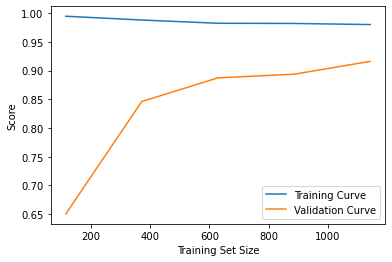

In [27]:
plt.plot(train_sizes, train_scores_mean, label='Training Curve')
plt.plot(train_sizes, test_scores_mean, label = 'Validation Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend()

In [28]:
clf.fit(X_train, y_train)

SVC(C=10, degree=1, gamma=0.1, probability=True)

In [29]:
clf.score(X_test, y_test)

0.9203354297693921